In [1]:
#Assignment 2 - problem 1
import numpy as np

# Transition matrix
P = np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3],
    [0.4, 0.3, 0.3]
])

# 1. Probability of being in the downtown region after two time steps
P2 = np.linalg.matrix_power(P, 2)
prob_downtown_after_two_steps = P2[1, 0]
print(f"Probability of being in downtown after two time steps: {prob_downtown_after_two_steps:.2f}")

# 2. Probability of being in the downtown region the first time after two time steps
prob_first_time_downtown_after_two_steps = P[1, 1] * P[1, 0] + P[1, 2] * P[2, 0]
print(f"Probability of being in downtown the first time after two time steps: {prob_first_time_downtown_after_two_steps:.2f}")

# 3. Check if the Markov chain is irreducible
def is_irreducible(P):
    n = P.shape[0]
    reachability_matrix = np.linalg.matrix_power(P, n-1)
    return np.all(reachability_matrix > 0)

irreducible = is_irreducible(P)
print(f"Is the Markov chain irreducible? {'Yes' if irreducible else 'No'}")

# 4. Stationary distribution
eigvals, eigvecs = np.linalg.eig(P.T)
stationary_distribution = eigvecs[:, np.isclose(eigvals, 1)]
stationary_distribution = stationary_distribution / stationary_distribution.sum()
print(f"Stationary distribution: {stationary_distribution.flatten()}")

# 5. Expected number of steps until first time entering downtown from suburbs
max_steps = 30
hitting_times = np.zeros((3, 3))
for k in range(1, max_steps + 1):
    hitting_times += np.linalg.matrix_power(P, k)

expected_hitting_time = hitting_times[1, 0]
print(f"Expected number of steps to first enter downtown from suburbs: {expected_hitting_time:.1f}")


Probability of being in downtown after two time steps: 0.28
Probability of being in downtown the first time after two time steps: 0.22
Is the Markov chain irreducible? Yes
Stationary distribution: [0.28888889 0.41111111 0.3       ]
Expected number of steps to first enter downtown from suburbs: 8.6


In [1]:
#Assignment 2 - problem 1
import numpy as np

# Transition matrix
P = np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3],
    [0.4, 0.3, 0.3]
])

# Compute P^2
P2 = np.linalg.matrix_power(P, 2)

# Probability of being in the downtown region after two time steps from the suburbs
prob_downtown_after_two_steps = P2[1, 0]
print(f"Probability of being in downtown after two time steps: {prob_downtown_after_two_steps:.4f}")


Probability of being in downtown after two time steps: 0.2800


In [2]:
#Assignment 2 - problem 1
# Probability of being in downtown the first time after two time steps
prob_first_time_downtown_after_two_steps = P[1, 1] * P[1, 0] + P[1, 2] * P[2, 0]
print(f"Probability of being in downtown the first time after two time steps: {prob_first_time_downtown_after_two_steps:.4f}")


Probability of being in downtown the first time after two time steps: 0.2200


In [3]:
#Assignment 2 - problem 1
def is_irreducible(P):
    n = P.shape[0]
    reachability_matrix = np.linalg.matrix_power(P, n-1)
    return np.all(reachability_matrix > 0)

irreducible = is_irreducible(P)
print(f"Is the Markov chain irreducible? {'Yes' if irreducible else 'No'}")


Is the Markov chain irreducible? Yes


In [4]:
#Assignment 2 - problem 1
# Find the stationary distribution
eigvals, eigvecs = np.linalg.eig(P.T)
stationary_distribution = eigvecs[:, np.isclose(eigvals, 1)]
stationary_distribution = stationary_distribution / stationary_distribution.sum()
print(f"Stationary distribution: {stationary_distribution.flatten()}")


Stationary distribution: [0.28888889 0.41111111 0.3       ]


In [5]:
#Assignment 2 - problem 1
# Compute expected hitting times (up to max_steps = 30)
max_steps = 30
hitting_times = np.zeros((3, 3))

for k in range(1, max_steps + 1):
    hitting_times += np.linalg.matrix_power(P, k)

# Expected number of steps to first enter downtown from suburbs
expected_hitting_time = hitting_times[1, 0]
print(f"Expected number of steps to first enter downtown from suburbs: {expected_hitting_time:.1f}")


Expected number of steps to first enter downtown from suburbs: 8.6


In [1]:
#Assignment 2 - problem 1 (another option)
import numpy as np

# Transition matrix
P = np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3],
    [0.4, 0.3, 0.3]
])

# 1. Probability of being in downtown after two steps, starting from suburbs
def two_step_probability():
    suburbs_index = 1
    downtown_index = 0
    two_step_prob = np.linalg.matrix_power(P, 2)[suburbs_index, downtown_index]
    return two_step_prob

# 2. Probability of being in downtown for the first time after two steps, starting from suburbs
def first_time_two_step_probability():
    suburbs_to_downtown = P[1, 0]
    suburbs_to_suburbs = P[1, 1]
    suburbs_to_countryside = P[1, 2]
    countryside_to_downtown = P[2, 0]
    return suburbs_to_suburbs * suburbs_to_downtown + suburbs_to_countryside * countryside_to_downtown

# 3. Check if the Markov chain is irreducible
def is_irreducible():
    n = len(P)
    reachable = np.eye(n)
    for _ in range(n):
        reachable = np.dot(reachable, P) + reachable
    return np.all(reachable > 0)

# 4. Find the stationary distribution
def stationary_distribution():
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    stationary = eigenvectors[:, np.isclose(eigenvalues, 1)].real
    return stationary / np.sum(stationary)

# 5. Expected number of steps to reach downtown from suburbs
def expected_steps_to_downtown():
    suburbs_index = 1
    downtown_index = 0
    max_steps = 30
    total_prob = 0
    expected_steps = 0
    
    for steps in range(1, max_steps + 1):
        prob = np.linalg.matrix_power(P, steps)[suburbs_index, downtown_index] - total_prob
        total_prob += prob
        expected_steps += steps * prob
        
    return expected_steps

print(f"1. Probability of being in downtown after two steps: {two_step_probability():.4f}")
print(f"2. Probability of being in downtown for the first time after two steps: {first_time_two_step_probability():.4f}")
print(f"3. Is the Markov chain irreducible? {is_irreducible()}")
print(f"4. Stationary distribution: {stationary_distribution().flatten()}")
print(f"5. Expected number of steps to reach downtown from suburbs: {expected_steps_to_downtown():.1f}")

1. Probability of being in downtown after two steps: 0.2800
2. Probability of being in downtown for the first time after two steps: 0.2200
3. Is the Markov chain irreducible? True
4. Stationary distribution: [0.28888889 0.41111111 0.3       ]
5. Expected number of steps to reach downtown from suburbs: 0.4


In [1]:
#Assignment 2 - problem 3
import numpy as np

def MLeForAssignment2Problem3(x):
    n = len(x)
    sum_x = np.sum(x)
    lambda_mle = 5 * n / sum_x
    return lambda_mle

In [3]:
#Assignment 2 - problem 2 another problem  -p

import numpy as np
from scipy.optimize import minimize

# Simulate data from Normal(10, 2)
np.random.seed(42)
normallySimulatedDataSamples = np.random.normal(loc=10, scale=np.sqrt(2), size=30)

# Define the negative log-likelihood function
def neg_log_likelihood(params, data):
    mu, sigma = params
    n = len(data)
    return -np.sum(np.log(1/(sigma*np.sqrt(2*np.pi))) - (1/(2*sigma**2))*(data-mu)**2)

# Define the objective function (negative log-likelihood)
def objective(params):
    return neg_log_likelihood(params, normallySimulatedDataSamples)

# Initial guess
initial_guess = [0, 1]

# Bounds for μ and σ
bounds = [(-20, 20), (0.1, 5.0)]

# Perform the optimization
result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=bounds)

# Extract the MLEs
mle_mu, mle_sigma = result.x

print(f"MLE for μ: {mle_mu:.4f}")
print(f"MLE for σ: {mle_sigma:.4f}")

# Compare with sample statistics
print(f"\nSample mean: {np.mean(normallySimulatedDataSamples):.4f}")
print(f"Sample standard deviation: {np.std(normallySimulatedDataSamples, ddof=1):.4f}")

MLE for μ: 9.7339
MLE for σ: 1.2514

Sample mean: 9.7339
Sample standard deviation: 1.2728


In [1]:
#Assignment 2 - problem 2
import numpy as np
from scipy import optimize

# Set seed for reproducibility
np.random.seed(123456)

# Simulate 30 IID samples drawn from a Normal(10, 2) distribution
normallySimulatedDataSamples = np.random.normal(10, 2, 30)

# Define the negative log-likelihood function
def negLogLklOfIIDNormalSamples(params):
    """ 
    Returns the negative log-likelihood of normallySimulatedDataSamples
    with parameters mu (mean) and sigma (standard deviation).
    """
    mu_param, sigma_param = params
    n = len(normallySimulatedDataSamples)
    
    # Ensure sigma is strictly positive to avoid issues with log and division
    if sigma_param <= 0:
        return np.inf
    
    # Compute the negative log-likelihood
    term1 = n * np.log(sigma_param * np.sqrt(2 * np.pi))
    term2 = np.sum((normallySimulatedDataSamples - mu_param) ** 2) / (2 * sigma_param ** 2)
    
    return term1 + term2

# Define the bounds for mu and sigma
parameter_bounding_box = ((-20, 20), (0.1, 5.0))  # Constraints on mu and sigma

# Initial guess for mu and sigma
initial_guess = np.array([5, 1])

# Use scipy's minimize function to perform the optimization
result = optimize.minimize(
    negLogLklOfIIDNormalSamples,   # The function to minimize
    initial_guess,                 # Initial guess for [mu, sigma]
    bounds=parameter_bounding_box,  # Bounds for the parameters
    method='L-BFGS-B'              # Optimization method suited for bounded problems
)

# Output the result of the optimization
print(f"MLE for mean (mu): {result.x[0]:.4f}")
print(f"MLE for standard deviation (sigma): {result.x[1]:.4f}")


MLE for mean (mu): 9.2686
MLE for standard deviation (sigma): 1.7082


In [2]:
#Assignment 2 - problem 2 - another option
import numpy as np
from scipy import optimize
# do NOT change the next three lines
np.random.seed(123456) # set seed
# simulate 30 IID samples drawn from Normal(10,2)RV
normallySimulatedDataSamples = np.random.normal(10,2,30) 

# define the negative log likelihoo function you want to minimise by editing XXX
def negLogLklOfIIDNormalSamples(parameters):
    '''return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    mu_param=parameters[0]
    sigma_param=parameters[1]
    
    # Penalize non-positive sigma values to avoid division by zero
    if sigma_param <= 0:
        return np.inf
    
    # Log likelihood calculation
    n = len(normallySimulatedDataSamples)
    log_likelihood_value = -n * np.log(sigma_param * np.sqrt(2 * np.pi)) - np.sum((normallySimulatedDataSamples - mu_param) ** 2) / (2 * sigma_param ** 2)
    
    return -log_likelihood_value  # Return the negative log likelihood

# you should only change XXX below and not anything else
parameter_bounding_box=((-20, 20), (0.1, 5.0)) # specify the constraints for each parameter - some guess work...
initial_arguments = np.array([10, 2]) # point in 2D to initialise the minimize algorithm
result_problem2_opt = optimize.minimize(negLogLklOfIIDNormalSamples, initial_arguments, bounds=parameter_bounding_box, XXX) 
# call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
result_problem2_opt

SyntaxError: positional argument follows keyword argument (3754556138.py, line 28)

In [ ]:
#Assignment 2 - problem 2 - another option 2
import numpy as np
from scipy import optimize

# Set seed for reproducibility
np.random.seed(123456)

# Simulate 30 IID samples drawn from Normal(10,2) RV
normallySimulatedDataSamples = np.random.normal(10, 2, 30)

# Define the negative log likelihood function
def negLogLklOfIIDNormalSamples(parameters):
    '''Return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    mu_param = parameters[0]
    sigma_param = parameters[1]
    n = len(normallySimulatedDataSamples)
    log_likelihood = -np.sum(np.log(1/(sigma_param * np.sqrt(2 * np.pi))) - ((normallySimulatedDataSamples - mu_param)**2 / (2 * sigma_param**2)))
    return -log_likelihood

# Specify the constraints for each parameter
parameter_bounding_box = ((-20, 20), (0.1, 5.0))

# Initial guess for the parameters
initial_arguments = np.array([10, 2])

# Call the minimize method
result_problem2_opt = optimize.minimize(negLogLklOfIIDNormalSamples, initial_arguments, bounds=parameter_bounding_box, method='L-BFGS-B')

# Output the result
result_problem2_opt


In [1]:
#Assignment 2 - problem 4 - part 1
def problem4_LCG(size=None, seed=0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    
    # LCG parameters (good set that satisfies Hull-Dobell Theorem)
    M = 2**32       # Modulus, typically a large number
    a = 1664525     # Multiplier
    b = 1013904223  # Increment
    
    # Initialize with seed
    X = seed
    
    # Output list for random numbers
    random_numbers = []
    
    for _ in range(size):
        # Generate the next random number in the sequence
        X = (a * X + b) % M
        
        # Normalize to the range [0, 1]
        random_number = X / M
        
        # Append to the output list
        random_numbers.append(random_number)
    
    return random_numbers

# Example usage:
samples = problem4_LCG(size=10, seed=123456)
print(samples)


[0.08174041635356843, 0.202598896343261, 0.16400373936630785, 0.5603366764262319, 0.6423963464330882, 0.01461450895294547, 0.4515828744042665, 0.22008573450148106, 0.44328905059956014, 0.9430172056891024]


In [2]:
#Assignment 2 - problem 4 - part 2
def problem4_uniform(generator=None, period=1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.
    
    Parameters
    -------------
    generator : a function of type generator(size, seed) and produces pseudo random numbers
                in the range {0, 1, ..., period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of uniform pseudo random numbers in [0,1]
    """
    
    # Call the generator function to get the random numbers in the range [0, period-1]
    random_numbers = generator(size=size, seed=seed)
    
    # Normalize the random numbers to be in the range [0,1]
    uniform_random_numbers = [num / period for num in random_numbers]
    
    return uniform_random_numbers

# Example usage with LCG:
samples = problem4_uniform(generator=problem4_LCG, period=1, size=10, seed=123456)
print(samples)


[0.08174041635356843, 0.202598896343261, 0.16400373936630785, 0.5603366764262319, 0.6423963464330882, 0.01461450895294547, 0.4515828744042665, 0.22008573450148106, 0.44328905059956014, 0.9430172056891024]


In [3]:
#Assignment 2 - problem 4 - part 3
import numpy as np

def problem4_accept_reject(uniformGenerator=None, n_iterations=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers 
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution.
    Runs n_iterations
    
    Parameters
    -------------
    generator : a function of the type generator(size, seed) that produces uniform pseudo random
                numbers from [0,1]
    seed : the seed to be used in the generator provided
    n_iterations : an integer denoting how many attempts should be made in the accept-reject sampler
    
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    np.random.seed(seed)
    samples = []
    M = np.pi / 2  # Maximum of the target distribution p_0(x)

    for _ in range(n_iterations):
        # Generate u from U(0,1)
        u = uniformGenerator(size=1, seed=np.random.randint(0, 100000))[0]

        # Generate v from U(0,1)
        v = uniformGenerator(size=1, seed=np.random.randint(0, 100000))[0]

        # Accept the sample if v <= p_0(u) / (M * g(u))
        p0_u = (np.pi / 2) * abs(np.sin(2 * np.pi * u))
        if v <= p0_u / M:
            samples.append(u)

    return samples

# Example usage
def uniform_generator_example(size, seed=0):
    np.random.seed(seed)
    return np.random.uniform(0, 1, size)

samples = problem4_accept_reject(uniformGenerator=uniform_generator_example, n_iterations=10000, seed=123)
print(samples[:10])  # Print the first 10 generated samples


[np.float64(0.19431405251970102), np.float64(0.740250525876183), np.float64(0.3318926366758018), np.float64(0.8015779426618691), np.float64(0.43580090078845235), np.float64(0.1412374061135827), np.float64(0.7508708656982942), np.float64(0.5741530603134027), np.float64(0.8126870314778178), np.float64(0.31968364893687107)]


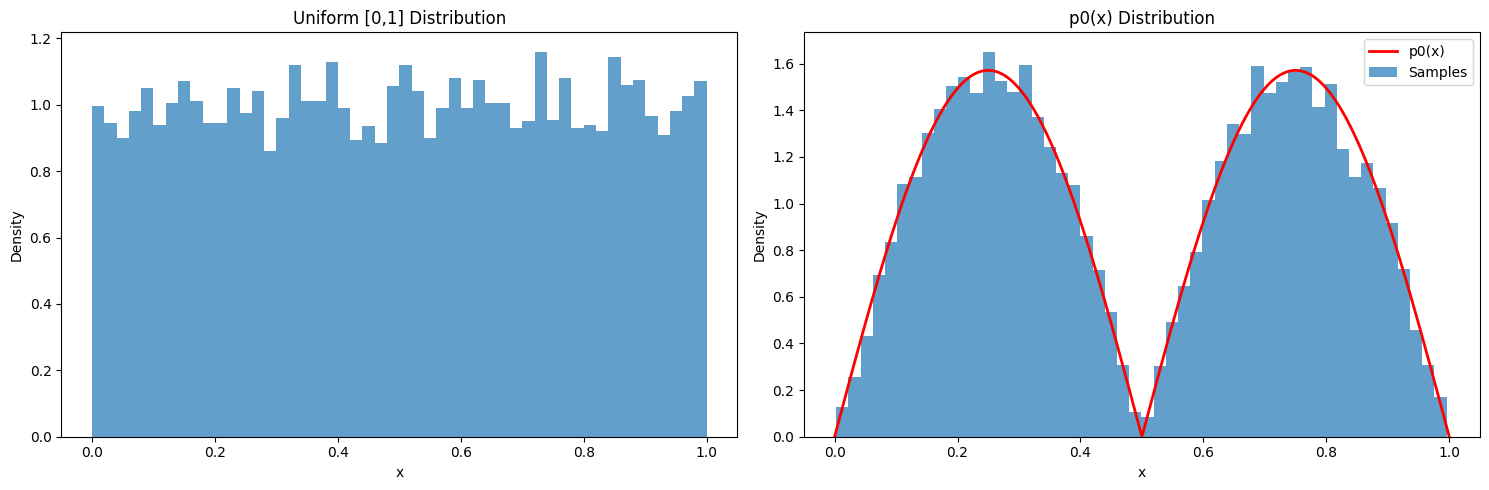

Uniform [0,1] mean: 0.5030 (expected: 0.5000)
Uniform [0,1] variance: 0.0831 (expected: 0.0833)
p0(x) mean: 0.4982
p0(x) variance: 0.0734


In [4]:
#Assignment 2 - problem 4 -p

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Linear Congruential Generator
class LCG:
    def __init__(self, seed, a, b, M):
        self.state = seed
        self.a = a
        self.b = b
        self.M = M
    
    def next(self):
        self.state = (self.a * self.state + self.b) % self.M
        return self.state

# Parameters for LCG (these satisfy Hull-Dobell theorem)
seed = 12345
a = 1103515245
b = 12345
M = 2**31 - 1

lcg = LCG(seed, a, b, M)

# Step 2: Uniform [0,1] generator
def uniform_01():
    return lcg.next() / M

# Step 3: Accept-Reject sampler for p0(x)
def p0(x):
    return np.pi/2 * np.abs(np.sin(2*np.pi*x))

def accept_reject_p0(n_samples):
    samples = []
    max_p0 = np.pi/2  # Maximum value of p0(x)
    
    while len(samples) < n_samples:
        x = uniform_01()
        u = uniform_01()
        
        if u <= p0(x) / max_p0:
            samples.append(x)
    
    return np.array(samples)

# Generate samples
n_samples = 10000
uniform_samples = np.array([uniform_01() for _ in range(n_samples)])
p0_samples = accept_reject_p0(n_samples)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot uniform distribution
ax1.hist(uniform_samples, bins=50, density=True, alpha=0.7)
ax1.set_title('Uniform [0,1] Distribution')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')

# Plot p0 distribution
x = np.linspace(0, 1, 1000)
ax2.plot(x, p0(x), 'r-', lw=2, label='p0(x)')
ax2.hist(p0_samples, bins=50, density=True, alpha=0.7, label='Samples')
ax2.set_title('p0(x) Distribution')
ax2.set_xlabel('x')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Uniform [0,1] mean: {np.mean(uniform_samples):.4f} (expected: 0.5000)")
print(f"Uniform [0,1] variance: {np.var(uniform_samples):.4f} (expected: 0.0833)")
print(f"p0(x) mean: {np.mean(p0_samples):.4f}")
print(f"p0(x) variance: {np.var(p0_samples):.4f}")